### Restaurar variáveis do Python

In [4]:
%store -r -d urca metrics forecast e1071 tseries

### LIBs (R)

In [243]:
# bibliotecas do python
import rpy2.robjects as ro
from rpy2.robjects.packages import importr
import rpy2.robjects.packages as rpackages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from inspect import currentframe
from natsort import natsorted
from prettytable import PrettyTable

In [ ]:
%%capture
# ***********DEMORA************
# Só rode se nunca tiver rodado esta célula 
# bibliotecas do R
base = importr('base')
utils = importr('utils')
utils.chooseCRANmirror(ind=1)
ts_analysis = ('urca','tseries','forecast','e1071','Metrics')

from rpy2.robjects.vectors import StrVector
utils.install_packages(StrVector(ts_analysis))

In [7]:
# importando as bibliotecas do R usadas para predição

urca = importr('urca')
tseries = importr('tseries')
forecast = importr('forecast')
e1071 = importr('e1071')
metrics = importr('Metrics')

In [8]:
# %R - "linha mágica" - retorna valor como objeto python

# %%R - "célula mágica" - nao retorna valor mas consegue passar input e output  

# Arguments
# -i  -  variaveis de input
# -o  -  variaveis de output
# -h  -  altura do plot
# -w  -  largura do plot


%load_ext rpy2.ipython

## BBR

### Geraçāo de gráficos CE-SP

In [100]:
Ts_Original_CE_SP_bbr = pd.read_csv('datasets vazao/sem outliers/bbr/sem outliers bbr CE-SP 10-21.csv')
Ts_pred_GRU_CE_SP_bbr = pd.read_csv('./predicoes vazao/GRU/bbr/prediction_plot_bbr_CE-SP_GRU.csv')
Ts_pred_LSTM_CE_SP_bbr = pd.read_csv('./predicoes vazao/LSTM/bbr/prediction_plot_bbr_CE-SP_LSTM.csv')

In [101]:
%%R -i Ts_pred_GRU_CE_SP_bbr -i Ts_pred_LSTM_CE_SP_bbr -i Ts_Original_CE_SP_bbr

Ts_pred_GRU_CE_SP_bbr = ts(Ts_pred_GRU_CE_SP_bbr, start = c(106,1), frequency = 6)
Ts_pred_LSTM_CE_SP_bbr = ts(Ts_pred_LSTM_CE_SP_bbr, start = c(106,1), frequency = 6)
Ts_Original_View_R_CE_SP_bbr = ts(Ts_Original_CE_SP_bbr, start = c(1,1), end= c(1,900), frequency = 6)

In [102]:
%%R # Separar conjuntos de treino

mytsTrain105_CE_SP_bbr = window(Ts_Original_View_R_CE_SP_bbr, start = c(1,1), end = c(105,6))
mytsTest106_CE_SP_bbr = window(Ts_Original_View_R_CE_SP_bbr, start = c(106,1), end = c(145,6))
mytsNeural105_CE_SP_bbr = nnetar(mytsTrain105_CE_SP_bbr)
prevNeural105_CE_SP_bbr = forecast(mytsNeural105_CE_SP_bbr, h=240)


In [103]:
%%R # salvar predição RNA e serie de Teste

dt_prevNeural105_CE_SP_bbr = data.frame(prevNeural105_CE_SP_bbr$mean)
names(dt_prevNeural105_CE_SP_bbr) = NULL
write.csv(dt_prevNeural105_CE_SP_bbr,"./predicoes vazao/NNETAR/bbr/prediction_plot_bbr_CE-SP_NNETAR.csv", row.names = FALSE)

dt_Test106_CE_SP_bbr = data.frame(mytsTest106_CE_SP_bbr)
names(dt_Test106_CE_SP_bbr) = NULL
write.csv(dt_Test106_CE_SP_bbr,"./predicoes vazao/series de teste/bbr/mytsTest106_plot_bbr_CE-SP.csv", row.names = FALSE)

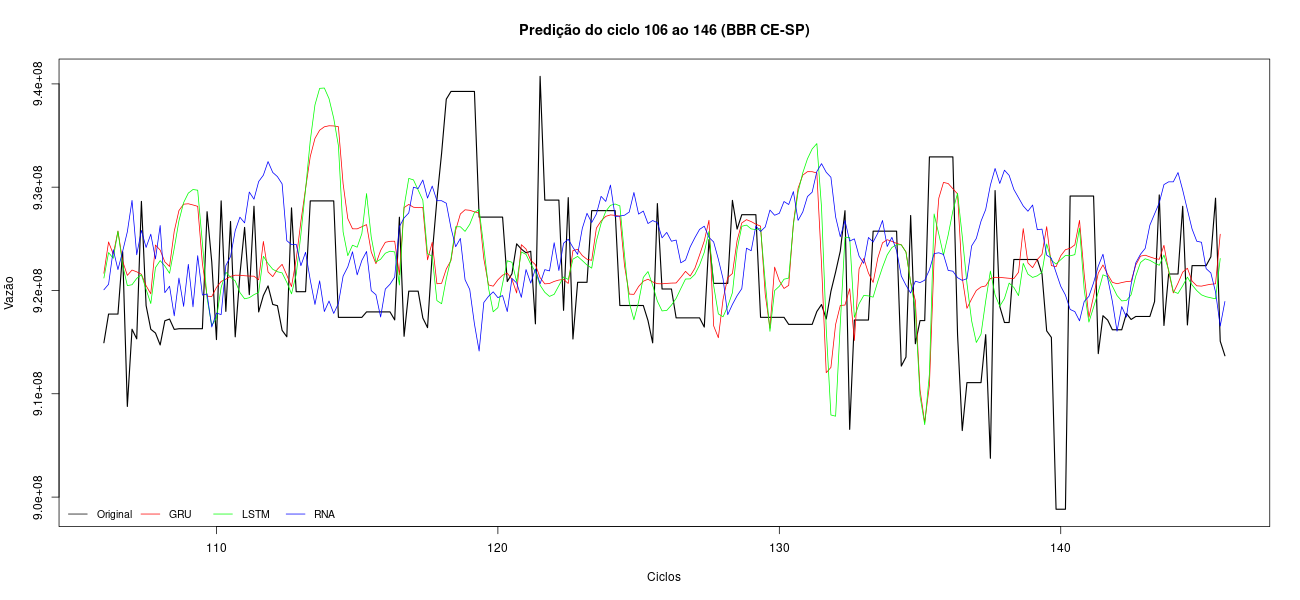

In [104]:
%%R -w 1300 -h 600

minimo = min(c(mytsTest106_CE_SP_bbr, Ts_pred_GRU_CE_SP_bbr, Ts_pred_LSTM_CE_SP_bbr, prevNeural105_CE_SP_bbr$mean)) - 1000
maximo = max(c(mytsTest106_CE_SP_bbr, Ts_pred_GRU_CE_SP_bbr, Ts_pred_LSTM_CE_SP_bbr, prevNeural105_CE_SP_bbr$mean)) + 1000
plot(mytsTest106_CE_SP_bbr, main= "Predição do ciclo 106 ao 146 (BBR CE-SP)", xlab="Ciclos", ylab="Vazāo", ylim=c(minimo, maximo), lwd=1.5)
lines(Ts_pred_GRU_CE_SP_bbr, col="red", border="orange")
lines(Ts_pred_LSTM_CE_SP_bbr, col="green")
lines(prevNeural105_CE_SP_bbr$mean, col="blue")
legend("bottomleft", legend = c("Original", "GRU", "LSTM","RNA"), 
       col = c("black", "red","green","blue"), lty=1:1, cex=0.87, bty = "n", horiz=T)

### Geraçāo de gráficos MG-RS

In [105]:
Ts_Original_MG_RS_bbr = pd.read_csv('datasets vazao/sem outliers/bbr/sem outliers bbr MG-RS 10-21.csv')
Ts_pred_GRU_MG_RS_bbr = pd.read_csv('./predicoes vazao/GRU/bbr/prediction_plot_bbr_MG-RS_GRU.csv')
Ts_pred_LSTM_MG_RS_bbr = pd.read_csv('./predicoes vazao/LSTM/bbr/prediction_plot_bbr_MG-RS_LSTM.csv')

In [106]:
%%R -i Ts_pred_GRU_MG_RS_bbr -i Ts_pred_LSTM_MG_RS_bbr -i Ts_Original_MG_RS_bbr

Ts_pred_GRU_MG_RS_bbr = ts(Ts_pred_GRU_MG_RS_bbr, start = c(106,1), frequency = 6)
Ts_pred_LSTM_MG_RS_bbr = ts(Ts_pred_LSTM_MG_RS_bbr, start = c(106,1), frequency = 6)
Ts_Original_View_R_MG_RS_bbr = ts(Ts_Original_MG_RS_bbr, start = c(1,1), end= c(1,900), frequency = 6)

In [107]:
%%R # Separar conjuntos de treino

mytsTrain105_MG_RS_bbr = window(Ts_Original_View_R_MG_RS_bbr, start = c(1,1), end = c(105,6))
mytsTest106_MG_RS_bbr = window(Ts_Original_View_R_MG_RS_bbr, start = c(106,1), end = c(145,6))
mytsNeural105_MG_RS_bbr = nnetar(mytsTrain105_MG_RS_bbr)
prevNeural105_MG_RS_bbr = forecast(mytsNeural105_MG_RS_bbr, h=240)

In [108]:
%%R # salvar predição RNA e serie de Teste

dt_prevNeural105_MG_RS_bbr = data.frame(prevNeural105_MG_RS_bbr$mean)
names(dt_prevNeural105_MG_RS_bbr) = NULL
write.csv(dt_prevNeural105_MG_RS_bbr,"./predicoes vazao/NNETAR/bbr/prediction_plot_bbr_MG-RS_NNETAR.csv", row.names = FALSE)

dt_Test106_MG_RS_bbr = data.frame(mytsTest106_MG_RS_bbr)
names(dt_Test106_MG_RS_bbr) = NULL
write.csv(dt_Test106_MG_RS_bbr,"./predicoes vazao/series de teste/bbr/mytsTest106_plot_bbr_MG-RS.csv", row.names = FALSE)

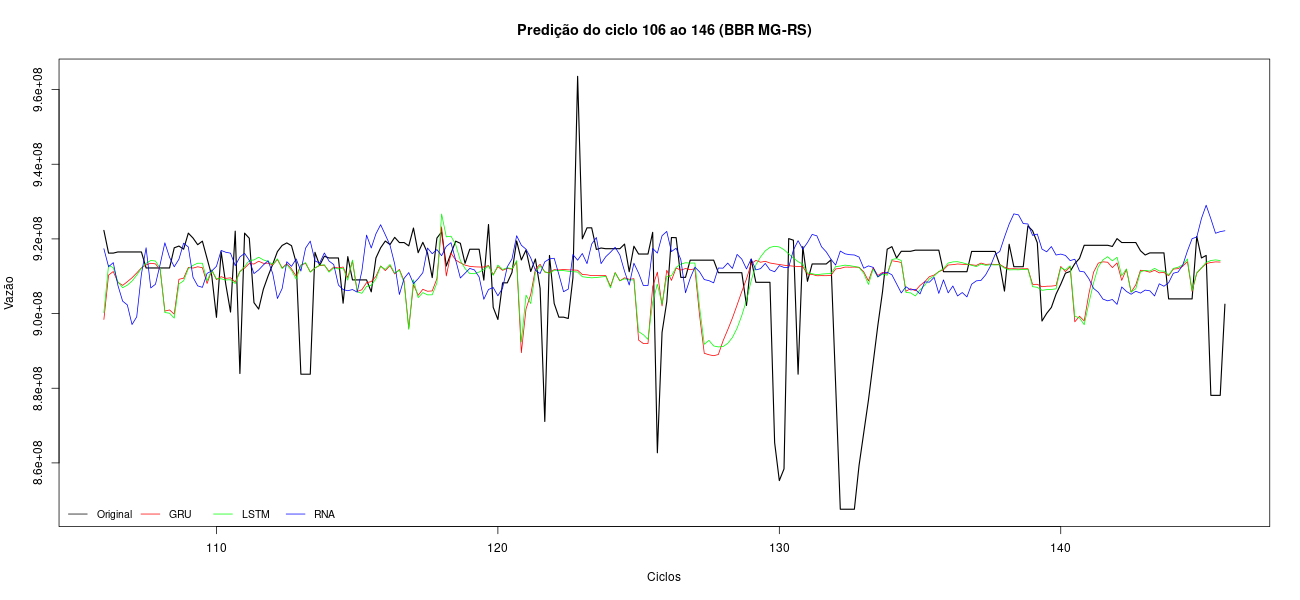

In [109]:
%%R -w 1300 -h 600

minimo = min(c(mytsTest106_MG_RS_bbr, Ts_pred_GRU_MG_RS_bbr, Ts_pred_LSTM_MG_RS_bbr, prevNeural105_MG_RS_bbr$mean)) - 1000
maximo = max(c(mytsTest106_MG_RS_bbr, Ts_pred_GRU_MG_RS_bbr, Ts_pred_LSTM_MG_RS_bbr, prevNeural105_MG_RS_bbr$mean)) + 1000
plot(mytsTest106_MG_RS_bbr, main= "Predição do ciclo 106 ao 146 (BBR MG-RS)", xlab="Ciclos", ylab="Vazāo", ylim=c(minimo, maximo), lwd=1.5)
lines(Ts_pred_GRU_MG_RS_bbr, col="red", border="orange")
lines(Ts_pred_LSTM_MG_RS_bbr, col="green")
lines(prevNeural105_MG_RS_bbr$mean, col="blue")
legend("bottomleft", legend = c("Original", "GRU", "LSTM","RNA"), 
       col = c("black", "red","green","blue"), lty=1:1, cex=0.87, bty = "n", horiz=T)

### Geraçāo de gráficos PA-BA

In [110]:
Ts_Original_PA_BA_bbr = pd.read_csv('datasets vazao/sem outliers/bbr/sem outliers bbr CE-SP 10-21.csv')
Ts_pred_GRU_PA_BA_bbr = pd.read_csv('./predicoes vazao/GRU/bbr/prediction_plot_bbr_CE-SP_GRU.csv')
Ts_pred_LSTM_PA_BA_bbr = pd.read_csv('./predicoes vazao/LSTM/bbr/prediction_plot_bbr_CE-SP_LSTM.csv')

In [111]:
%%R -i Ts_pred_GRU_PA_BA_bbr -i Ts_pred_LSTM_PA_BA_bbr -i Ts_Original_PA_BA_bbr

Ts_pred_GRU_PA_BA_bbr = ts(Ts_pred_GRU_PA_BA_bbr, start = c(106,1), frequency = 6)
Ts_pred_LSTM_PA_BA_bbr = ts(Ts_pred_LSTM_PA_BA_bbr, start = c(106,1), frequency = 6)
Ts_Original_View_R_PA_BA_bbr = ts(Ts_Original_PA_BA_bbr, start = c(1,1), end= c(1,900), frequency = 6)

In [112]:
%%R # Separar conjuntos de treino

mytsTrain105_PA_BA_bbr = window(Ts_Original_View_R_PA_BA_bbr, start = c(1,1), end = c(105,6))
mytsTest106_PA_BA_bbr = window(Ts_Original_View_R_PA_BA_bbr, start = c(106,1), end = c(145,6))
mytsNeural105_PA_BA_bbr = nnetar(mytsTrain105_PA_BA_bbr)
prevNeural105_PA_BA_bbr = forecast(mytsNeural105_PA_BA_bbr, h=240)

In [113]:
%%R # salvar predição RNA e serie de Teste

dt_prevNeural105_PA_BA_bbr = data.frame(prevNeural105_PA_BA_bbr$mean)
names(dt_prevNeural105_PA_BA_bbr) = NULL
write.csv(dt_prevNeural105_PA_BA_bbr,"./predicoes vazao/NNETAR/bbr/prediction_plot_bbr_PA-BA_NNETAR.csv", row.names = FALSE)

dt_Test106_PA_BA_bbr = data.frame(mytsTest106_PA_BA_bbr)
names(dt_Test106_PA_BA_bbr) = NULL
write.csv(dt_Test106_PA_BA_bbr,"./predicoes vazao/series de teste/bbr/mytsTest106_plot_bbr_PA-BA.csv", row.names = FALSE)

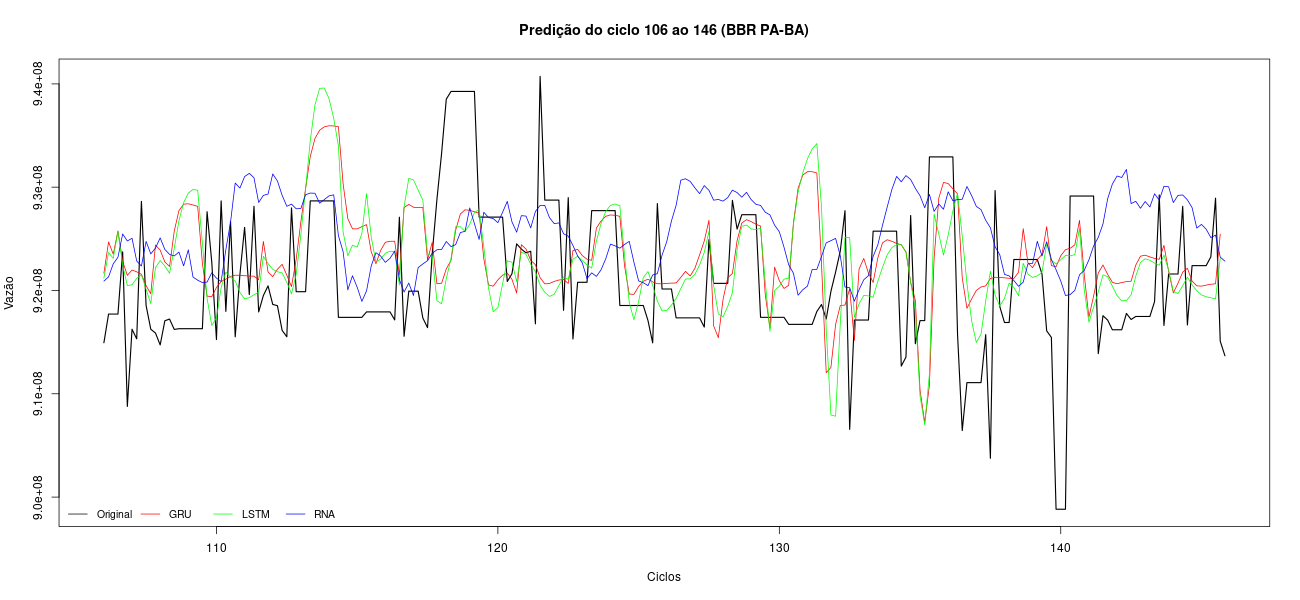

In [114]:
%%R -w 1300 -h 600

minimo = min(c(mytsTest106_PA_BA_bbr, Ts_pred_GRU_PA_BA_bbr, Ts_pred_LSTM_PA_BA_bbr, prevNeural105_PA_BA_bbr$mean)) - 1000
maximo = max(c(mytsTest106_PA_BA_bbr, Ts_pred_GRU_PA_BA_bbr, Ts_pred_LSTM_PA_BA_bbr, prevNeural105_PA_BA_bbr$mean)) + 1000
plot(mytsTest106_PA_BA_bbr, main= "Predição do ciclo 106 ao 146 (BBR PA-BA)", xlab="Ciclos", ylab="Vazāo", ylim=c(minimo, maximo), lwd=1.5)
lines(Ts_pred_GRU_PA_BA_bbr, col="red", border="orange")
lines(Ts_pred_LSTM_PA_BA_bbr, col="green")
lines(prevNeural105_PA_BA_bbr$mean, col="blue")
legend("bottomleft", legend = c("Original", "GRU", "LSTM","RNA"), 
       col = c("black", "red","green","blue"), lty=1:1, cex=0.87, bty = "n", horiz=T)

### Geraçāo de gráficos PR-AM

In [115]:
Ts_Original_PR_AM_bbr = pd.read_csv('datasets vazao/sem outliers/bbr/sem outliers bbr PR-AM 10-21.csv')
Ts_pred_GRU_PR_AM_bbr = pd.read_csv('./predicoes vazao/GRU/bbr/prediction_plot_bbr_PR-AM_GRU.csv')
Ts_pred_LSTM_PR_AM_bbr = pd.read_csv('./predicoes vazao/LSTM/bbr/prediction_plot_bbr_PR-AM_LSTM.csv')

In [116]:
%%R -i Ts_pred_GRU_PR_AM_bbr -i Ts_pred_LSTM_PR_AM_bbr -i Ts_Original_PR_AM_bbr

Ts_pred_GRU_PR_AM_bbr = ts(Ts_pred_GRU_PR_AM_bbr, start = c(106,1), frequency = 6)
Ts_pred_LSTM_PR_AM_bbr = ts(Ts_pred_LSTM_PR_AM_bbr, start = c(106,1), frequency = 6)
Ts_Original_View_R_PR_AM_bbr = ts(Ts_Original_PR_AM_bbr, start = c(1,1), end= c(1,900), frequency = 6)

In [117]:
%%R # Separar conjuntos de treino

mytsTrain105_PR_AM_bbr = window(Ts_Original_View_R_PR_AM_bbr, start = c(1,1), end = c(105,6))
mytsTest106_PR_AM_bbr = window(Ts_Original_View_R_PR_AM_bbr, start = c(106,1), end = c(145,6))
mytsNeural105_PR_AM_bbr = nnetar(mytsTrain105_PR_AM_bbr)
prevNeural105_PR_AM_bbr = forecast(mytsNeural105_PR_AM_bbr, h=240)

In [118]:
%%R # salvar predição RNA e serie de Teste

dt_prevNeural105_PR_AM_bbr = data.frame(prevNeural105_PR_AM_bbr$mean)
names(dt_prevNeural105_PR_AM_bbr) = NULL
write.csv(dt_prevNeural105_PR_AM_bbr,"./predicoes vazao/NNETAR/bbr/prediction_plot_bbr_PR-AM_NNETAR.csv", row.names = FALSE)

dt_Test106_PR_AM_bbr = data.frame(mytsTest106_PR_AM_bbr)
names(dt_Test106_PR_AM_bbr) = NULL
write.csv(dt_Test106_PR_AM_bbr,"./predicoes vazao/series de teste/bbr/mytsTest106_plot_bbr_PR-AM.csv", row.names = FALSE)

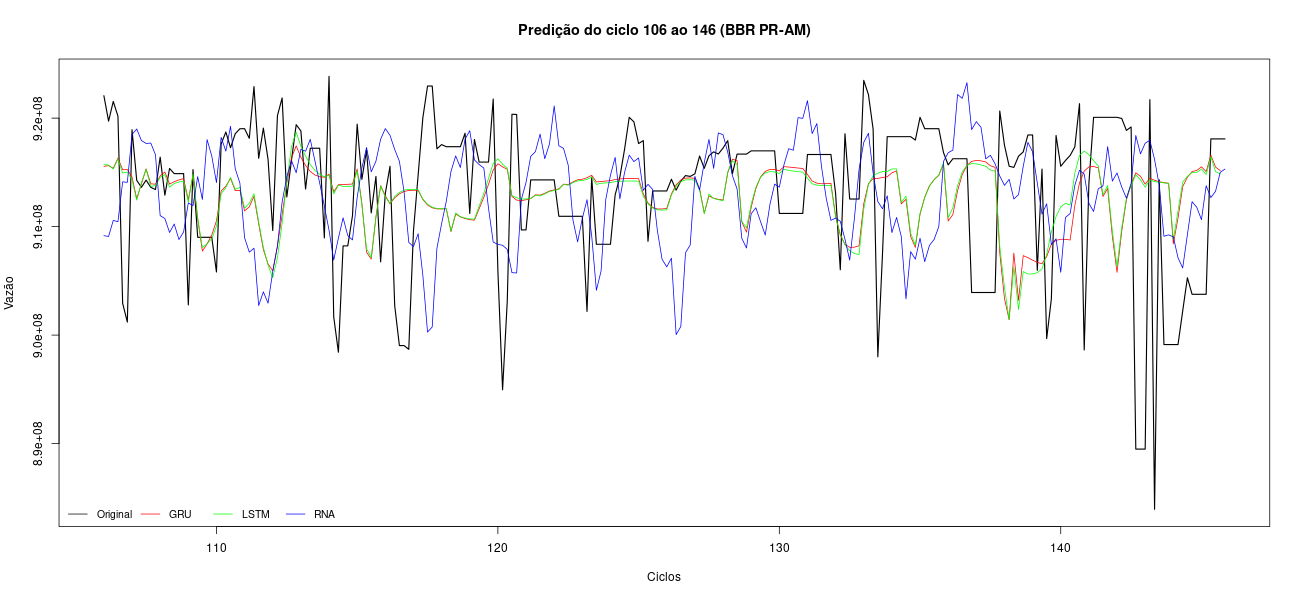

In [119]:
%%R -w 1300 -h 600

minimo = min(c(mytsTest106_PR_AM_bbr, Ts_pred_GRU_PR_AM_bbr, Ts_pred_LSTM_PR_AM_bbr, prevNeural105_PR_AM_bbr$mean)) - 1000
maximo = max(c(mytsTest106_PR_AM_bbr, Ts_pred_GRU_PR_AM_bbr, Ts_pred_LSTM_PR_AM_bbr, prevNeural105_PR_AM_bbr$mean)) + 1000
plot(mytsTest106_PR_AM_bbr, main= "Predição do ciclo 106 ao 146 (BBR PR-AM)", xlab="Ciclos", ylab="Vazāo", ylim=c(minimo, maximo), lwd=1.5)
lines(Ts_pred_GRU_PR_AM_bbr, col="red", border="orange")
lines(Ts_pred_LSTM_PR_AM_bbr, col="green")
lines(prevNeural105_PR_AM_bbr$mean, col="blue")
legend("bottomleft", legend = c("Original", "GRU", "LSTM","RNA"), 
       col = c("black", "red","green","blue"), lty=1:1, cex=0.87, bty = "n", horiz=T)

## Cubic

### Geraçāo de gráficos CE-SP

In [146]:
Ts_Original_CE_SP_cubic = pd.read_csv('datasets vazao/sem outliers/cubic/sem outliers cubic CE-SP 10-21.csv')
Ts_pred_GRU_CE_SP_cubic = pd.read_csv('./predicoes vazao/GRU/cubic/prediction_plot_cubic_CE-SP_GRU.csv')
Ts_pred_LSTM_CE_SP_cubic = pd.read_csv('./predicoes vazao/LSTM/cubic/prediction_plot_cubic_CE-SP_LSTM.csv')

In [147]:
%%R -i Ts_pred_GRU_CE_SP_cubic -i Ts_pred_LSTM_CE_SP_cubic -i Ts_Original_CE_SP_cubic

Ts_pred_GRU_CE_SP_cubic = ts(Ts_pred_GRU_CE_SP_cubic, start = c(106,1), frequency = 6)
Ts_pred_LSTM_CE_SP_cubic = ts(Ts_pred_LSTM_CE_SP_cubic, start = c(106,1), frequency = 6)
Ts_Original_View_R_CE_SP_cubic = ts(Ts_Original_CE_SP_cubic, start = c(1,1), end= c(1,900), frequency = 6)

In [148]:
%%R # Separar conjuntos de treino

mytsTrain105_CE_SP_cubic = window(Ts_Original_View_R_CE_SP_cubic, start = c(1,1), end = c(105,6))
mytsTest106_CE_SP_cubic = window(Ts_Original_View_R_CE_SP_cubic, start = c(106,1), end = c(145,6))
mytsNeural105_CE_SP_cubic = nnetar(mytsTrain105_CE_SP_cubic)
prevNeural105_CE_SP_cubic = forecast(mytsNeural105_CE_SP_cubic, h=240)

In [149]:
%%R # salvar predição RNA e serie de Teste

dt_prevNeural105_CE_SP_cubic = data.frame(prevNeural105_CE_SP_cubic$mean)
names(dt_prevNeural105_CE_SP_cubic) = NULL
write.csv(dt_prevNeural105_CE_SP_cubic,"./predicoes vazao/NNETAR/cubic/prediction_plot_cubic_CE-SP_NNETAR.csv", row.names = FALSE)

dt_Test106_CE_SP_cubic = data.frame(mytsTest106_CE_SP_cubic)
names(dt_Test106_CE_SP_cubic) = NULL
write.csv(dt_Test106_CE_SP_cubic,"./predicoes vazao/series de teste/cubic/mytsTest106_plot_cubic_CE-SP.csv", row.names = FALSE)

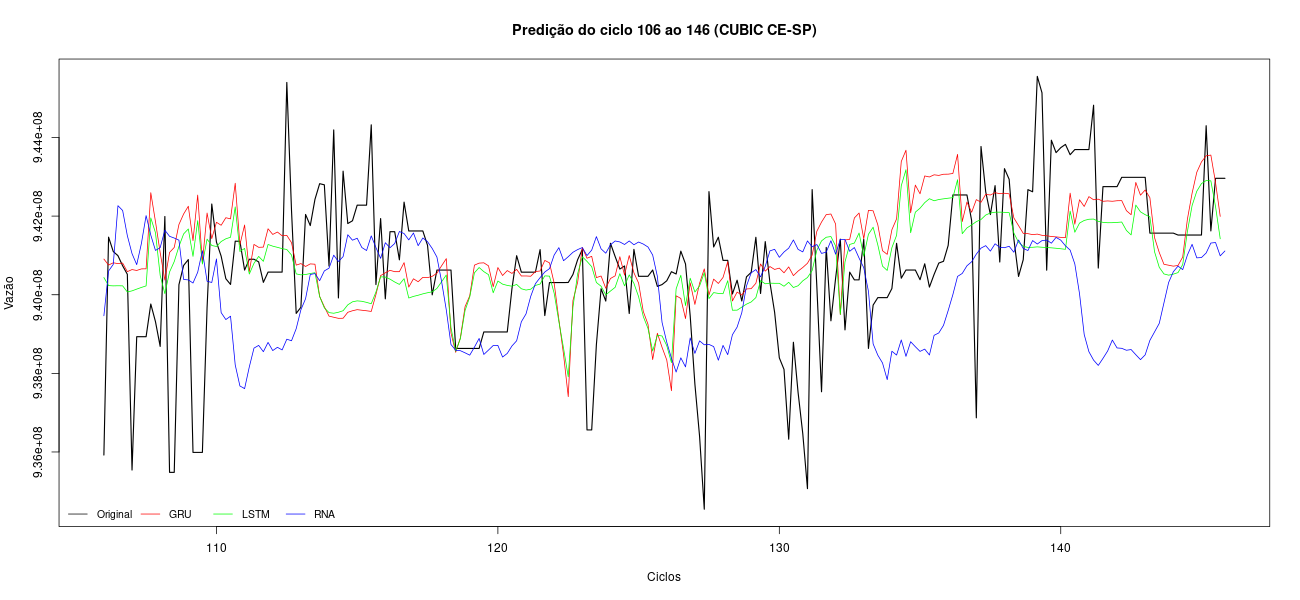

In [150]:
%%R -w 1300 -h 600

minimo = min(c(mytsTest106_CE_SP_cubic, Ts_pred_GRU_CE_SP_cubic, Ts_pred_LSTM_CE_SP_cubic, prevNeural105_CE_SP_cubic$mean)) - 1000
maximo = max(c(mytsTest106_CE_SP_cubic, Ts_pred_GRU_CE_SP_cubic, Ts_pred_LSTM_CE_SP_cubic, prevNeural105_CE_SP_cubic$mean)) + 1000
plot(mytsTest106_CE_SP_cubic, main= "Predição do ciclo 106 ao 146 (CUBIC CE-SP)", xlab="Ciclos", ylab="Vazāo", ylim=c(minimo, maximo), lwd=1.5)
lines(Ts_pred_GRU_CE_SP_cubic, col="red", border="orange")
lines(Ts_pred_LSTM_CE_SP_cubic, col="green")
lines(prevNeural105_CE_SP_cubic$mean, col="blue")
legend("bottomleft", legend = c("Original", "GRU", "LSTM","RNA"), 
       col = c("black", "red","green","blue"), lty=1:1, cex=0.87, bty = "n", horiz=T)

### Geraçāo de gráficos MG-RS

In [151]:
Ts_Original_MG_RS_cubic = pd.read_csv('datasets vazao/sem outliers/cubic/sem outliers cubic MG-RS 10-21.csv')
Ts_pred_GRU_MG_RS_cubic = pd.read_csv('./predicoes vazao/GRU/cubic/prediction_plot_cubic_MG-RS_GRU.csv')
Ts_pred_LSTM_MG_RS_cubic = pd.read_csv('./predicoes vazao/LSTM/cubic/prediction_plot_cubic_MG-RS_LSTM.csv')

In [152]:
%%R -i Ts_pred_GRU_MG_RS_cubic -i Ts_pred_LSTM_MG_RS_cubic -i Ts_Original_MG_RS_cubic

Ts_pred_GRU_MG_RS_cubic = ts(Ts_pred_GRU_MG_RS_cubic, start = c(106,1), frequency = 6)
Ts_pred_LSTM_MG_RS_cubic = ts(Ts_pred_LSTM_MG_RS_cubic, start = c(106,1), frequency = 6)
Ts_Original_View_R_MG_RS_cubic = ts(Ts_Original_MG_RS_cubic, start = c(1,1), end= c(1,900), frequency = 6)

In [153]:
%%R # Separar conjuntos de treino

mytsTrain105_MG_RS_cubic = window(Ts_Original_View_R_MG_RS_cubic, start = c(1,1), end = c(105,6))
mytsTest106_MG_RS_cubic = window(Ts_Original_View_R_MG_RS_cubic, start = c(106,1), end = c(145,6))
mytsNeural105_MG_RS_cubic = nnetar(mytsTrain105_MG_RS_cubic)
prevNeural105_MG_RS_cubic = forecast(mytsNeural105_MG_RS_cubic, h=240)

In [154]:
%%R # salvar predição RNA e serie de Teste

dt_prevNeural105_MG_RS_cubic = data.frame(prevNeural105_MG_RS_cubic$mean)
names(dt_prevNeural105_MG_RS_cubic) = NULL
write.csv(dt_prevNeural105_MG_RS_cubic,"./predicoes vazao/NNETAR/cubic/prediction_plot_cubic_MG-RS_NNETAR.csv", row.names = FALSE)

dt_Test106_MG_RS_cubic = data.frame(mytsTest106_MG_RS_cubic)
names(dt_Test106_MG_RS_cubic) = NULL
write.csv(dt_Test106_MG_RS_cubic,"./predicoes vazao/series de teste/cubic/mytsTest106_plot_cubic_MG-RS.csv", row.names = FALSE)

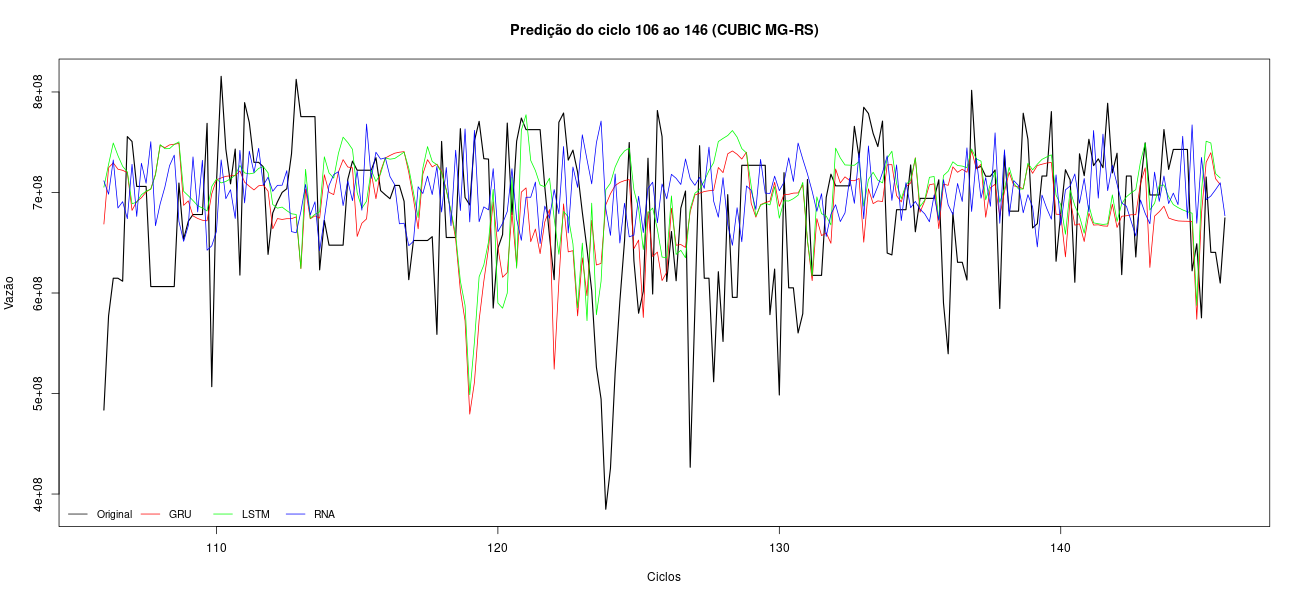

In [155]:
%%R -w 1300 -h 600

minimo = min(c(mytsTest106_MG_RS_cubic, Ts_pred_GRU_MG_RS_cubic, Ts_pred_LSTM_MG_RS_cubic, prevNeural105_MG_RS_cubic$mean)) - 1000
maximo = max(c(mytsTest106_MG_RS_cubic, Ts_pred_GRU_MG_RS_cubic, Ts_pred_LSTM_MG_RS_cubic, prevNeural105_MG_RS_cubic$mean)) + 1000
plot(mytsTest106_MG_RS_cubic, main= "Predição do ciclo 106 ao 146 (CUBIC MG-RS)", xlab="Ciclos", ylab="Vazāo", ylim=c(minimo, maximo), lwd=1.5)
lines(Ts_pred_GRU_MG_RS_cubic, col="red", border="orange")
lines(Ts_pred_LSTM_MG_RS_cubic, col="green")
lines(prevNeural105_MG_RS_cubic$mean, col="blue")
legend("bottomleft", legend = c("Original", "GRU", "LSTM","RNA"), 
       col = c("black", "red","green","blue"), lty=1:1, cex=0.87, bty = "n", horiz=T)

### Geraçāo de gráficos PA-BA

In [156]:
Ts_Original_PA_BA_cubic = pd.read_csv('datasets vazao/sem outliers/cubic/sem outliers cubic CE-SP 10-21.csv')
Ts_pred_GRU_PA_BA_cubic = pd.read_csv('./predicoes vazao/GRU/cubic/prediction_plot_cubic_CE-SP_GRU.csv')
Ts_pred_LSTM_PA_BA_cubic = pd.read_csv('./predicoes vazao/LSTM/cubic/prediction_plot_cubic_CE-SP_LSTM.csv')

In [157]:
%%R -i Ts_pred_GRU_PA_BA_cubic -i Ts_pred_LSTM_PA_BA_cubic -i Ts_Original_PA_BA_cubic

Ts_pred_GRU_PA_BA_cubic = ts(Ts_pred_GRU_PA_BA_cubic, start = c(106,1), frequency = 6)
Ts_pred_LSTM_PA_BA_cubic = ts(Ts_pred_LSTM_PA_BA_cubic, start = c(106,1), frequency = 6)
Ts_Original_View_R_PA_BA_cubic = ts(Ts_Original_PA_BA_cubic, start = c(1,1), end= c(1,900), frequency = 6)

In [158]:
%%R # Separar conjuntos de treino

mytsTrain105_PA_BA_cubic = window(Ts_Original_View_R_PA_BA_cubic, start = c(1,1), end = c(105,6))
mytsTest106_PA_BA_cubic = window(Ts_Original_View_R_PA_BA_cubic, start = c(106,1), end = c(145,6))
mytsNeural105_PA_BA_cubic = nnetar(mytsTrain105_PA_BA_cubic)
prevNeural105_PA_BA_cubic = forecast(mytsNeural105_PA_BA_cubic, h=240)

In [159]:
%%R # salvar predição RNA e serie de Teste

dt_prevNeural105_PA_BA_cubic = data.frame(prevNeural105_PA_BA_cubic$mean)
names(dt_prevNeural105_PA_BA_cubic) = NULL
write.csv(dt_prevNeural105_PA_BA_cubic,"./predicoes vazao/NNETAR/cubic/prediction_plot_cubic_PA-BA_NNETAR.csv", row.names = FALSE)

dt_Test106_PA_BA_cubic = data.frame(mytsTest106_PA_BA_cubic)
names(dt_Test106_PA_BA_cubic) = NULL
write.csv(dt_Test106_PA_BA_cubic,"./predicoes vazao/series de teste/cubic/mytsTest106_plot_cubic_PA-BA.csv", row.names = FALSE)

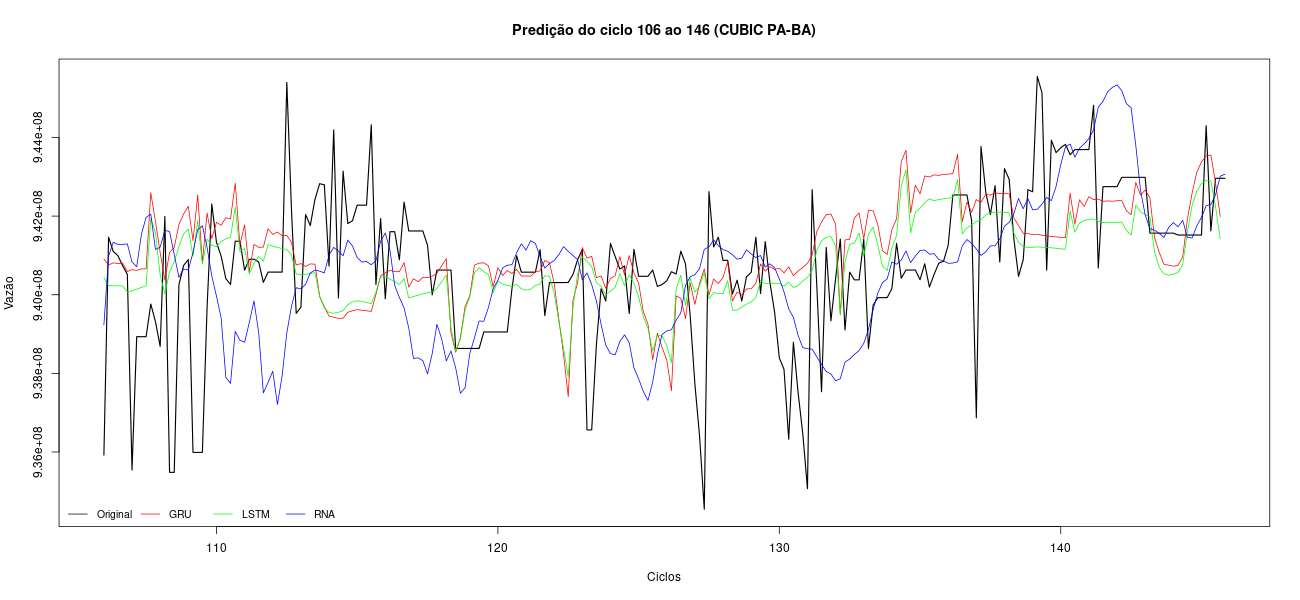

In [160]:
%%R -w 1300 -h 600

minimo = min(c(mytsTest106_PA_BA_cubic, Ts_pred_GRU_PA_BA_cubic, Ts_pred_LSTM_PA_BA_cubic, prevNeural105_PA_BA_cubic$mean)) - 1000
maximo = max(c(mytsTest106_PA_BA_cubic, Ts_pred_GRU_PA_BA_cubic, Ts_pred_LSTM_PA_BA_cubic, prevNeural105_PA_BA_cubic$mean)) + 1000
plot(mytsTest106_PA_BA_cubic, main= "Predição do ciclo 106 ao 146 (CUBIC PA-BA)", xlab="Ciclos", ylab="Vazāo", ylim=c(minimo, maximo), lwd=1.5)
lines(Ts_pred_GRU_PA_BA_cubic, col="red", border="orange")
lines(Ts_pred_LSTM_PA_BA_cubic, col="green")
lines(prevNeural105_PA_BA_cubic$mean, col="blue")
legend("bottomleft", legend = c("Original", "GRU", "LSTM","RNA"), 
       col = c("black", "red","green","blue"), lty=1:1, cex=0.87, bty = "n", horiz=T)

### Geraçāo de gráficos PR-AM

In [161]:
Ts_Original_PR_AM_cubic = pd.read_csv('datasets vazao/sem outliers/cubic/sem outliers cubic PR-AM 10-21.csv')
Ts_pred_GRU_PR_AM_cubic = pd.read_csv('./predicoes vazao/GRU/cubic/prediction_plot_cubic_PR-AM_GRU.csv')
Ts_pred_LSTM_PR_AM_cubic = pd.read_csv('./predicoes vazao/LSTM/cubic/prediction_plot_cubic_PR-AM_LSTM.csv')

In [162]:
%%R -i Ts_pred_GRU_PR_AM_cubic -i Ts_pred_LSTM_PR_AM_cubic -i Ts_Original_PR_AM_cubic

Ts_pred_GRU_PR_AM_cubic = ts(Ts_pred_GRU_PR_AM_cubic, start = c(106,1), frequency = 6)
Ts_pred_LSTM_PR_AM_cubic = ts(Ts_pred_LSTM_PR_AM_cubic, start = c(106,1), frequency = 6)
Ts_Original_View_R_PR_AM_cubic = ts(Ts_Original_PR_AM_cubic, start = c(1,1), end= c(1,900), frequency = 6)

In [163]:
%%R # Separar conjuntos de treino

mytsTrain105_PR_AM_cubic = window(Ts_Original_View_R_PR_AM_cubic, start = c(1,1), end = c(105,6))
mytsTest106_PR_AM_cubic = window(Ts_Original_View_R_PR_AM_cubic, start = c(106,1), end = c(145,6))
mytsNeural105_PR_AM_cubic = nnetar(mytsTrain105_PR_AM_cubic)
prevNeural105_PR_AM_cubic = forecast(mytsNeural105_PR_AM_cubic, h=240)

In [164]:
%%R # salvar predição RNA

dt_prevNeural105_PR_AM_cubic = data.frame(prevNeural105_PR_AM_cubic$mean)
names(dt_prevNeural105_PR_AM_cubic) = NULL
write.csv(dt_prevNeural105_PR_AM_cubic,"./predicoes vazao/NNETAR/cubic/prediction_plot_cubic_PR-AM_NNETAR.csv", row.names = FALSE)

dt_Test106_PR_AM_cubic = data.frame(mytsTest106_PR_AM_cubic)
names(dt_Test106_PR_AM_cubic) = NULL
write.csv(dt_Test106_PR_AM_cubic,"./predicoes vazao/series de teste/cubic/mytsTest106_plot_cubic_PR-AM.csv", row.names = FALSE)

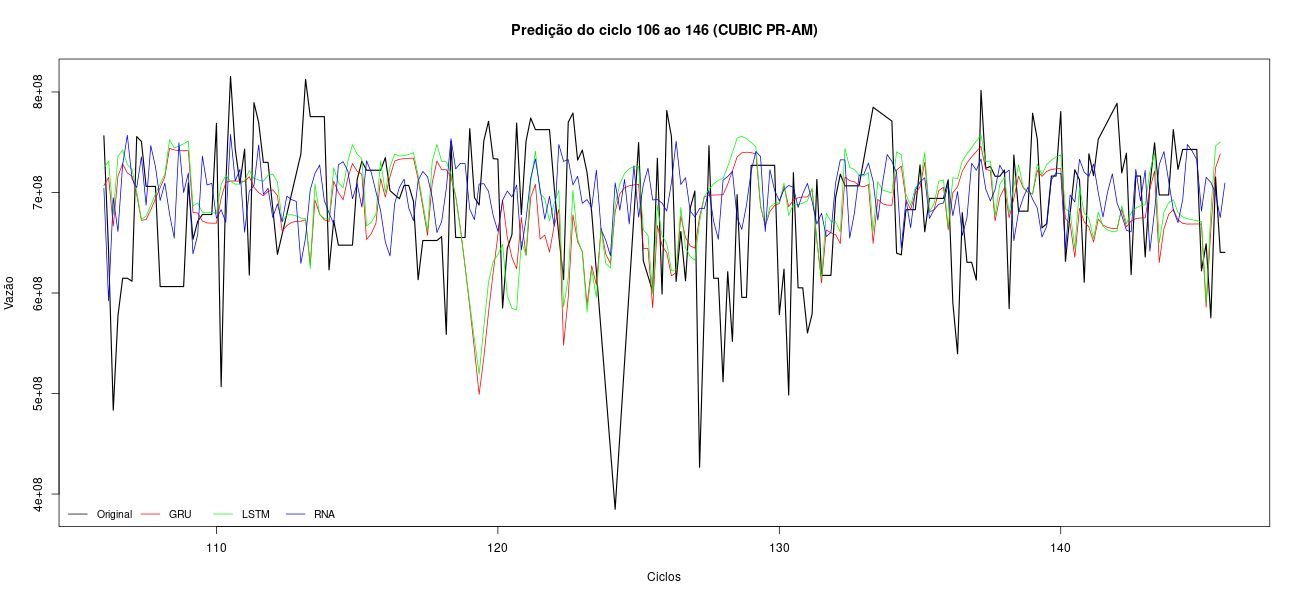

In [165]:
%%R -w 1300 -h 600

minimo = min(c(mytsTest106_PR_AM_cubic, Ts_pred_GRU_PR_AM_cubic, Ts_pred_LSTM_PR_AM_cubic, prevNeural105_PR_AM_cubic$mean)) - 1000
maximo = max(c(mytsTest106_PR_AM_cubic, Ts_pred_GRU_PR_AM_cubic, Ts_pred_LSTM_PR_AM_cubic, prevNeural105_PR_AM_cubic$mean)) + 1000
plot(mytsTest106_PR_AM_cubic, main= "Predição do ciclo 106 ao 146 (CUBIC PR-AM)", xlab="Ciclos", ylab="Vazāo", ylim=c(minimo, maximo), lwd=1.5)
lines(Ts_pred_GRU_PR_AM_cubic, col="red", border="orange")
lines(Ts_pred_LSTM_PR_AM_cubic, col="green")
lines(prevNeural105_PR_AM_cubic$mean, col="blue")
legend("bottomleft", legend = c("Original", "GRU", "LSTM","RNA"), 
       col = c("black", "red","green","blue"), lty=1:1, cex=0.87, bty = "n", horiz=T)

### Gerando as faixas de comparação

In [166]:
# importando (para o python) as predições feitas pelo nnetar e as series temporais de teste respectivas
Ts_pred_NNETAR_CE_SP_bbr = pd.read_csv('./predicoes vazao/NNETAR/bbr/prediction_plot_bbr_CE-SP_NNETAR.csv')
Ts_pred_NNETAR_MG_RS_bbr = pd.read_csv('./predicoes vazao/NNETAR/bbr/prediction_plot_bbr_MG-RS_NNETAR.csv')
Ts_pred_NNETAR_PA_BA_bbr = pd.read_csv('./predicoes vazao/NNETAR/bbr/prediction_plot_bbr_PA-BA_NNETAR.csv')
Ts_pred_NNETAR_PR_AM_bbr = pd.read_csv('./predicoes vazao/NNETAR/bbr/prediction_plot_bbr_PR-AM_NNETAR.csv')

Ts_pred_NNETAR_CE_SP_cubic = pd.read_csv('./predicoes vazao/NNETAR/cubic/prediction_plot_cubic_CE-SP_NNETAR.csv')
Ts_pred_NNETAR_MG_RS_cubic = pd.read_csv('./predicoes vazao/NNETAR/cubic/prediction_plot_cubic_MG-RS_NNETAR.csv')
Ts_pred_NNETAR_PA_BA_cubic = pd.read_csv('./predicoes vazao/NNETAR/cubic/prediction_plot_cubic_PA-BA_NNETAR.csv')
Ts_pred_NNETAR_PR_AM_cubic = pd.read_csv('./predicoes vazao/NNETAR/cubic/prediction_plot_cubic_PR-AM_NNETAR.csv')

mytsTest106_CE_SP_bbr = pd.read_csv('./predicoes vazao/series de teste/bbr/mytsTest106_plot_bbr_CE-SP.csv')
mytsTest106_MG_RS_bbr = pd.read_csv('./predicoes vazao/series de teste/bbr/mytsTest106_plot_bbr_MG-RS.csv')
mytsTest106_PA_BA_bbr = pd.read_csv('./predicoes vazao/series de teste/bbr/mytsTest106_plot_bbr_PA-BA.csv')
mytsTest106_PR_AM_bbr = pd.read_csv('./predicoes vazao/series de teste/bbr/mytsTest106_plot_bbr_PR-AM.csv')

mytsTest106_CE_SP_cubic = pd.read_csv('./predicoes vazao/series de teste/cubic/mytsTest106_plot_cubic_CE-SP.csv')
mytsTest106_MG_RS_cubic = pd.read_csv('./predicoes vazao/series de teste/cubic/mytsTest106_plot_cubic_MG-RS.csv')
mytsTest106_PA_BA_cubic = pd.read_csv('./predicoes vazao/series de teste/cubic/mytsTest106_plot_cubic_PA-BA.csv')
mytsTest106_PR_AM_cubic = pd.read_csv('./predicoes vazao/series de teste/cubic/mytsTest106_plot_cubic_PR-AM.csv')

In [278]:
# classificando os valores das series (listas: python)

def retrieve_name(var):
    callers_local_vars = currentframe().f_back.f_locals.items()
    return [var_name for var_name, var_val in callers_local_vars if var_val is var][0]

series = [mytsTest106_CE_SP_bbr,
        mytsTest106_CE_SP_cubic,
        mytsTest106_MG_RS_bbr,
        mytsTest106_MG_RS_cubic,
        mytsTest106_PA_BA_bbr,
        mytsTest106_PA_BA_cubic,
        mytsTest106_PR_AM_bbr,
        mytsTest106_PR_AM_cubic,
        Ts_pred_GRU_CE_SP_bbr,
        Ts_pred_GRU_CE_SP_cubic,
        Ts_pred_GRU_MG_RS_bbr,
        Ts_pred_GRU_MG_RS_cubic,
        Ts_pred_GRU_PA_BA_bbr,
        Ts_pred_GRU_PA_BA_cubic,
        Ts_pred_GRU_PR_AM_bbr,
        Ts_pred_GRU_PR_AM_cubic,
        Ts_pred_LSTM_CE_SP_bbr,
        Ts_pred_LSTM_CE_SP_cubic,
        Ts_pred_LSTM_MG_RS_bbr,
        Ts_pred_LSTM_MG_RS_cubic,
        Ts_pred_LSTM_PA_BA_bbr,
        Ts_pred_LSTM_PA_BA_cubic,
        Ts_pred_LSTM_PR_AM_bbr,
        Ts_pred_LSTM_PR_AM_cubic,
        Ts_pred_NNETAR_CE_SP_bbr,
        Ts_pred_NNETAR_CE_SP_cubic,
        Ts_pred_NNETAR_MG_RS_bbr,
        Ts_pred_NNETAR_MG_RS_cubic,
        Ts_pred_NNETAR_PA_BA_bbr,
        Ts_pred_NNETAR_PA_BA_cubic,
        Ts_pred_NNETAR_PR_AM_bbr,
        Ts_pred_NNETAR_PR_AM_cubic]

lista_nomes_series = []

dict_series_faixas = {}
dict_series_acerto_erro = {}

if len(series) == 32:
    for ts in series:
        ts_name = retrieve_name(ts)
        if ts_name.startswith("mytsTest"):
            dict_series_faixas.setdefault(ts_name, None)
        else:
            dict_series_faixas.setdefault(ts_name, None)
            dict_series_acerto_erro.setdefault(ts_name, None)
        lista_nomes_series.append(ts_name)


    for ts in series:
        ts_name = retrieve_name(ts)
        lista_aux = []
        for valor in ts[ts.columns[0]].to_list():
            valor = float(valor)
            if valor < 200000000:
                lista_aux.append("r")
            elif valor >= 200000000 and valor < 500000000:
                lista_aux.append("o")
            elif valor >= 500000000 and valor < 800000000:
                lista_aux.append("y")
            elif valor >= 800000000 and valor < 1000000000:
                lista_aux.append("b")
            else:
                lista_aux.append("g")
        dict_series_faixas[ts_name] = lista_aux

    
    arquivos = ["CE_SP_bbr",
                "CE_SP_cubic",
                "MG_RS_bbr",
                "MG_RS_cubic",
                "PA_BA_bbr",
                "PA_BA_cubic",
                "PR_AM_bbr",
                "PR_AM_cubic"]

    dict_numero_acertos = dict_series_acerto_erro.copy()
    dict_series_acerto_erro = dict_series_acerto_erro.copy()

    for finais in arquivos:
        series = list(filter(lambda x: x.endswith(finais), lista_nomes_series))
        series_teste = list(filter(lambda x: x.startswith("myts"), series))[0]
        faixa_teste = dict_series_faixas[series_teste]
        series.remove(series_teste)
        for serie in series:
            faixa_prevista = dict_series_faixas[serie]
            lista_aux = []
            for i in range(len(dict_series_faixas[series_teste])):
                if faixa_teste[i] == faixa_prevista[i]:
                    lista_aux.append(1)
                else:
                    lista_aux.append(0)
            dict_series_acerto_erro[serie] = lista_aux
            dict_numero_acertos[serie] = lista_aux.count(1)

    for name_previsao in natsorted(sorted(dict_numero_acertos.keys())):
        x = PrettyTable()
        #print(name_previsao, dict_numero_acertos[name_previsao])
        name_test = list(filter(lambda x: x.startswith("myts") and x.endswith(name_previsao[-9:]), lista_nomes_series))[0]
        x.field_names = ["Teste "+name_test, "Previsto "+name_previsao]
        for j in range(len(dict_series_faixas[name_previsao])):
            x.add_row([dict_series_faixas[name_test][j],dict_series_faixas[name_previsao][j]])
        #print(x) # tabelas de comparação

    y = PrettyTable()
    y.field_names = ["Previsão", "% de acerto"]
    for name_previsao in sorted(dict_numero_acertos.keys()):
        y.add_row([name_previsao, "{:.2f}%".format((dict_numero_acertos[name_previsao]/239*100))])
    print(y)
        
else:
    print("Número de series passadas errado")



+----------------------------+-------------+
|          Previsão          | % de acerto |
+----------------------------+-------------+
|   Ts_pred_GRU_CE_SP_bbr    |   100.00%   |
|  Ts_pred_GRU_CE_SP_cubic   |   100.00%   |
|   Ts_pred_GRU_MG_RS_bbr    |   100.00%   |
|  Ts_pred_GRU_MG_RS_cubic   |    96.23%   |
|   Ts_pred_GRU_PA_BA_bbr    |   100.00%   |
|  Ts_pred_GRU_PA_BA_cubic   |   100.00%   |
|   Ts_pred_GRU_PR_AM_bbr    |   100.00%   |
|  Ts_pred_GRU_PR_AM_cubic   |    95.82%   |
|   Ts_pred_LSTM_CE_SP_bbr   |   100.00%   |
|  Ts_pred_LSTM_CE_SP_cubic  |   100.00%   |
|   Ts_pred_LSTM_MG_RS_bbr   |   100.00%   |
|  Ts_pred_LSTM_MG_RS_cubic  |    96.23%   |
|   Ts_pred_LSTM_PA_BA_bbr   |   100.00%   |
|  Ts_pred_LSTM_PA_BA_cubic  |   100.00%   |
|   Ts_pred_LSTM_PR_AM_bbr   |   100.00%   |
|  Ts_pred_LSTM_PR_AM_cubic  |    96.23%   |
|  Ts_pred_NNETAR_CE_SP_bbr  |   100.00%   |
| Ts_pred_NNETAR_CE_SP_cubic |   100.00%   |
|  Ts_pred_NNETAR_MG_RS_bbr  |   100.00%   |
| Ts_pred_

### Salvando as variáveis do python

In [168]:
%%capture
%store mytsTest106_CE_SP_bbr mytsTest106_CE_SP_cubic mytsTest106_MG_RS_bbr mytsTest106_MG_RS_cubic mytsTest106_PA_BA_bbr mytsTest106_PA_BA_cubic mytsTest106_PR_AM_bbr mytsTest106_PR_AM_cubic
%store Ts_Original_CE_SP_bbr Ts_Original_CE_SP_cubic Ts_Original_MG_RS_bbr Ts_Original_MG_RS_cubic Ts_Original_PA_BA_bbr Ts_Original_PA_BA_cubic Ts_Original_PR_AM_bbr Ts_Original_PR_AM_cubic
%store Ts_pred_GRU_CE_SP_bbr Ts_pred_GRU_CE_SP_cubic Ts_pred_GRU_MG_RS_bbr Ts_pred_GRU_MG_RS_cubic Ts_pred_GRU_PA_BA_bbr Ts_pred_GRU_PA_BA_cubic Ts_pred_GRU_PR_AM_bbr Ts_pred_GRU_PR_AM_cubic
%store Ts_pred_LSTM_CE_SP_bbr Ts_pred_LSTM_CE_SP_cubic Ts_pred_LSTM_MG_RS_bbr Ts_pred_LSTM_MG_RS_cubic Ts_pred_LSTM_PA_BA_bbr Ts_pred_LSTM_PA_BA_cubic Ts_pred_LSTM_PR_AM_bbr Ts_pred_LSTM_PR_AM_cubic
%store Ts_pred_NNETAR_CE_SP_bbr Ts_pred_NNETAR_CE_SP_cubic Ts_pred_NNETAR_MG_RS_bbr Ts_pred_NNETAR_MG_RS_cubic Ts_pred_NNETAR_PA_BA_bbr Ts_pred_NNETAR_PA_BA_cubic Ts_pred_NNETAR_PR_AM_bbr Ts_pred_NNETAR_PR_AM_cubic
%store series dict_numero_acertos dict_series_acerto_erro dict_series_faixas